In [485]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [486]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder 
from sklearn.preprocessing import FunctionTransformer, RobustScaler

from sklearn import set_config
set_config(display="diagram")

import time

# import Classifier and neural network functionalities
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from scikeras.wrappers import KerasClassifier

####**Import, Inspect and Prepare Data**

In [400]:
# import data
house_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing-classification-iter6.csv', index_col='Id')
house_data.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [401]:
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv', index_col='Id')
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [402]:
y_test_true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results_class_kaggle.csv', index_col='Id')

In [403]:
# inspect dataframe
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [404]:
# Drop relatively empty columns
house_data = house_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
house_data.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,65.0,856,3,0,0,2,0,0,0,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,9600,80.0,1262,3,1,0,2,298,0,0,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,11250,68.0,920,3,1,0,2,0,0,0,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,9550,60.0,756,3,1,0,3,0,0,0,...,Gd,SBrkr,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,14260,84.0,1145,4,1,0,3,192,0,0,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [405]:
# inspect dataframe again
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [406]:
# reassign target.
y_train = house_data.pop('Expensive')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   MSZoning       1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Heating        1460 non-null   object 
 12  Street         1460 non-null   object 
 13  CentralAir     1460 non-null   object 
 14  Foundation     1460 non-null   object 
 15  ExterQual      1460 non-null   object 
 16  ExterCond      1460 non-null   object 
 17  BsmtQual       1423 non-null   object 
 18  BsmtCond

In [407]:
# summarize features
print(house_data.columns)
print('\n')
print('Total number of columns:', len(house_data.columns))

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSZoning',
       'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'KitchenQual', 'MSSubClass', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold',
       'YrSold', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtFinType2', 'HeatingQC', 'Electrica

#### **Prepare the data categories into numerical and categorical data**

    Done after inspecting the description of all the features.

In [408]:
# numerical features
X_num = house_data.select_dtypes(include='number')
X_num.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSSubClass,...,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,65.0,856,3,0,0,2,0,0,60,...,1,8,2003.0,548,61,0,0,0,2,2008
2,9600,80.0,1262,3,1,0,2,298,0,20,...,1,6,1976.0,460,0,0,0,0,5,2007
3,11250,68.0,920,3,1,0,2,0,0,60,...,1,6,2001.0,608,42,0,0,0,9,2008
4,9550,60.0,756,3,1,0,3,0,0,70,...,1,7,1998.0,642,35,272,0,0,2,2006
5,14260,84.0,1145,4,1,0,3,192,0,60,...,1,9,2000.0,836,84,0,0,0,12,2008


In [409]:
# inspect numerical data
print(X_num.columns)
print('\n')
print('Total number of columns:', len(X_num.columns))

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold',
       'YrSold'],
      dtype='object')


Total number of columns: 36


In [410]:
# categorical features
X_cat = house_data.select_dtypes(include='object')
X_cat.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,...,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,...,Gd,SBrkr,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [411]:
# inspect categorical data
print(X_cat.columns)
print('\n')
print('Total number of columns:', len(X_cat.columns))

Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


Total number of columns: 38


In [412]:
# Remove certain features from the numerical features. 
# Add them to the categorical data with their data type changed.

X_cat.loc[:,'MSSubClass'] = X_num.pop('MSSubClass')
X_cat.loc[:,'MSSubClass'] = X_cat.loc[:,'MSSubClass'].astype(str)

X_cat.loc[:,'MoSold'] = X_num.pop('MoSold')
X_cat.loc[:,'MoSold'] = X_cat.loc[:,'MoSold'].astype(str)

X_cat.loc[:,'OverallQual'] = X_num.pop('OverallQual')
X_cat.loc[:,'OverallQual'] = X_cat.loc[:,'OverallQual'].astype(str)

X_cat.loc[:,'OverallCond'] = X_num.pop('OverallCond')
X_cat.loc[:,'OverallCond'] = X_cat.loc[:,'OverallCond'].astype(str)

print(X_num.columns)
print('\n')
print(X_cat.columns)

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'MiscVal', 'YrSold'],
      dtype='object')


Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'Functional', 'GarageType

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [413]:
# apply the same year feature engineering to test set.
X_test['Age_Sold'] = X_test.apply(lambda row: row['YrSold'] - row['YearBuilt'], axis=1)
X_test['Renovation'] = X_test.apply(lambda row: row['YearRemodAdd'] - row['YearBuilt'], axis=1)
X_test['Garage_Age'] = X_test.apply(lambda row: row['GarageYrBlt'] - row['YearBuilt'], axis=1)

X_test.drop(['YearBuilt', 'YrSold', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

In [414]:
# Ordinal categorical data
X_cat_ord = X_cat[['GarageCond', 'GarageFinish', 'GarageQual', 'Electrical', 'HeatingQC', 'BsmtFinType2', \
                     'BsmtFinType1', 'BsmtExposure', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'ExterCond', \
                     'ExterQual', 'Functional', 'OverallQual', 'OverallCond', 'Street', 'LotShape', \
                     'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'PavedDrive']]

X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1379 non-null   object
 1   GarageFinish  1379 non-null   object
 2   GarageQual    1379 non-null   object
 3   Electrical    1459 non-null   object
 4   HeatingQC     1460 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinType1  1423 non-null   object
 7   BsmtExposure  1422 non-null   object
 8   KitchenQual   1460 non-null   object
 9   BsmtQual      1423 non-null   object
 10  BsmtCond      1423 non-null   object
 11  ExterCond     1460 non-null   object
 12  ExterQual     1460 non-null   object
 13  Functional    1460 non-null   object
 14  OverallQual   1460 non-null   object
 15  OverallCond   1460 non-null   object
 16  Street        1460 non-null   object
 17  LotShape      1460 non-null   object
 18  LandContour   1460 non-null   object
 19  Utilit

In [415]:
# nominal categorical data
X_cat_onehot = X_cat.drop(X_cat_ord.columns.tolist(), axis=1)

X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   Heating        1460 non-null   object
 3   CentralAir     1460 non-null   object
 4   Foundation     1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   Condition2     1460 non-null   object
 7   BldgType       1460 non-null   object
 8   HouseStyle     1460 non-null   object
 9   RoofStyle      1460 non-null   object
 10  RoofMatl       1460 non-null   object
 11  Exterior1st    1460 non-null   object
 12  Exterior2nd    1460 non-null   object
 13  MasVnrType     1452 non-null   object
 14  GarageType     1379 non-null   object
 15  SaleType       1460 non-null   object
 16  SaleCondition  1460 non-null   object
 17  MSSubClass     1460 non-null   object
 18  MoSold         1460 non-null

####**Visualize the Data**

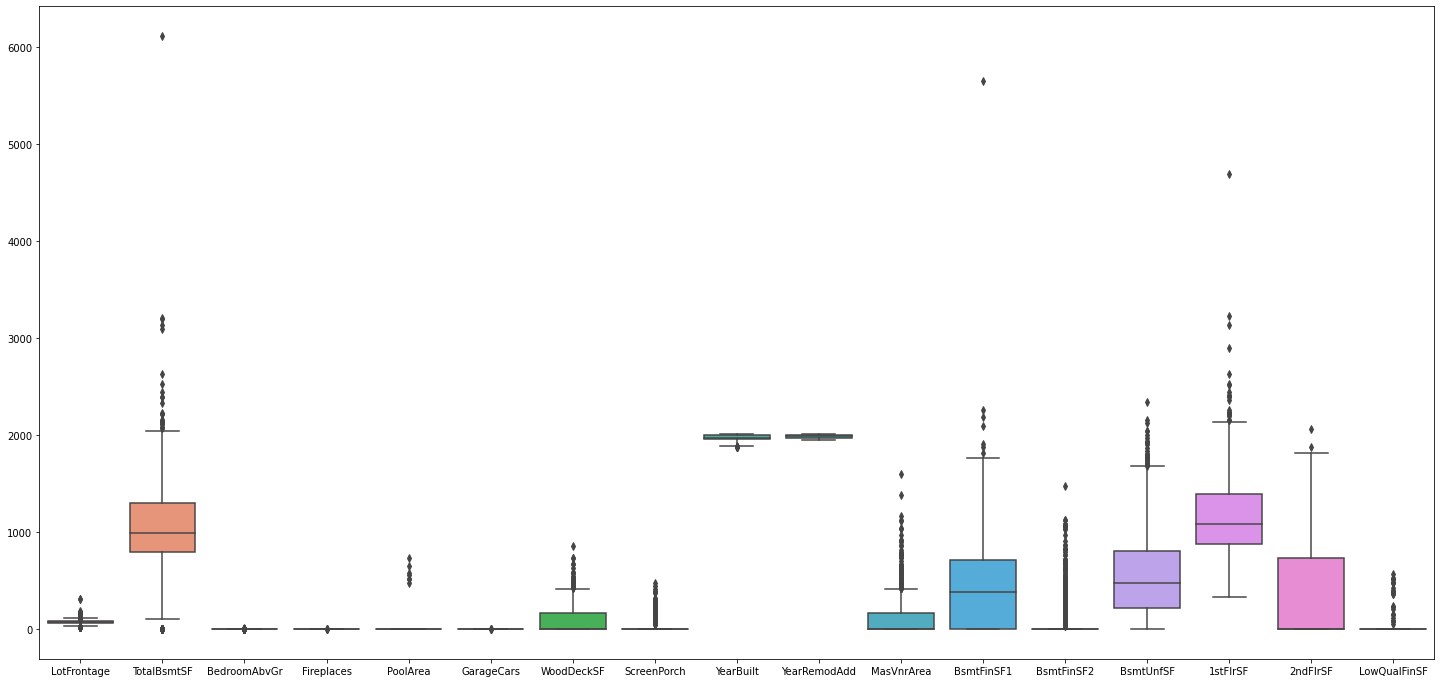

In [416]:
# Visualize numerical features
plt.figure(figsize=(25,12))
sns.boxplot(data=X_num.iloc[:, list(range(1, 18))])
plt.show();

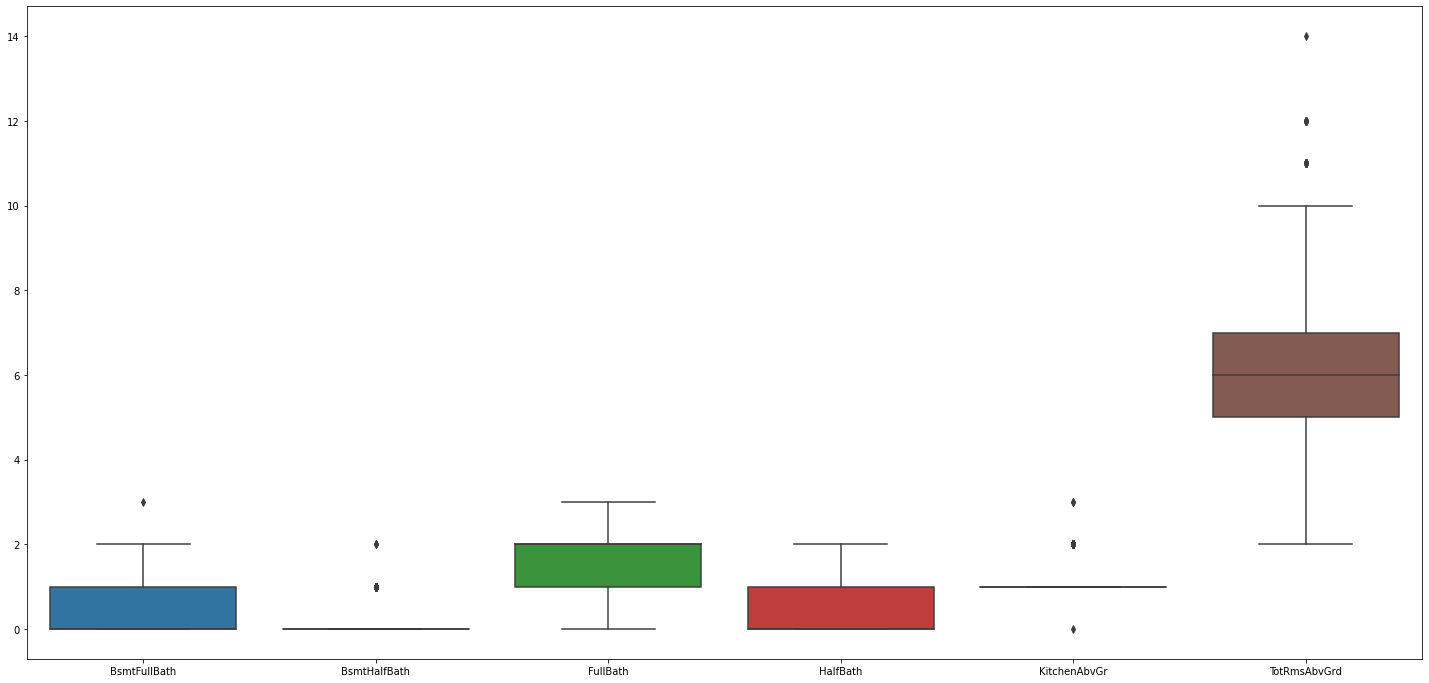

In [417]:
# Visualize numerical features
plt.figure(figsize=(25,12))
sns.boxplot(data=X_num.iloc[:, list(range(19, 25))])
plt.show();

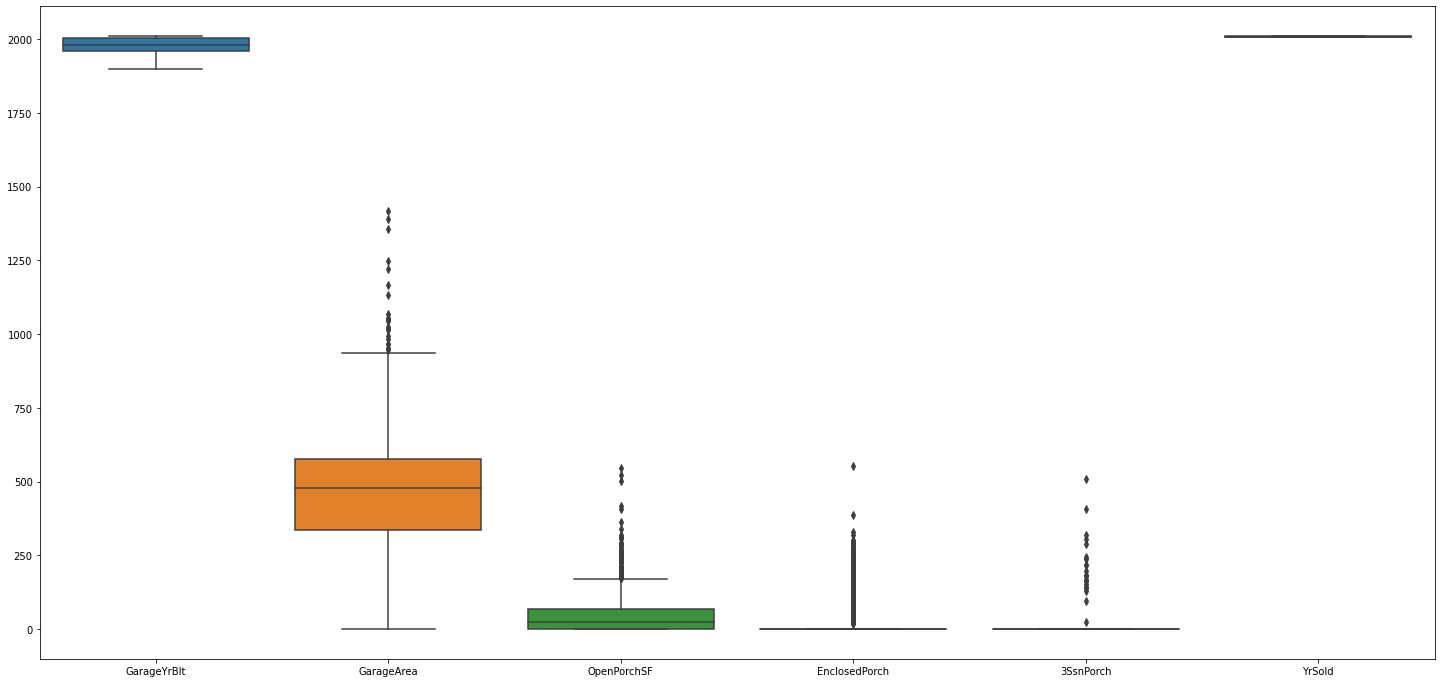

In [418]:
# Visualize numerical features
plt.figure(figsize=(25,12))
sns.boxplot(data=X_num.iloc[:, list(range(25, 30)) + [31]])
plt.show();

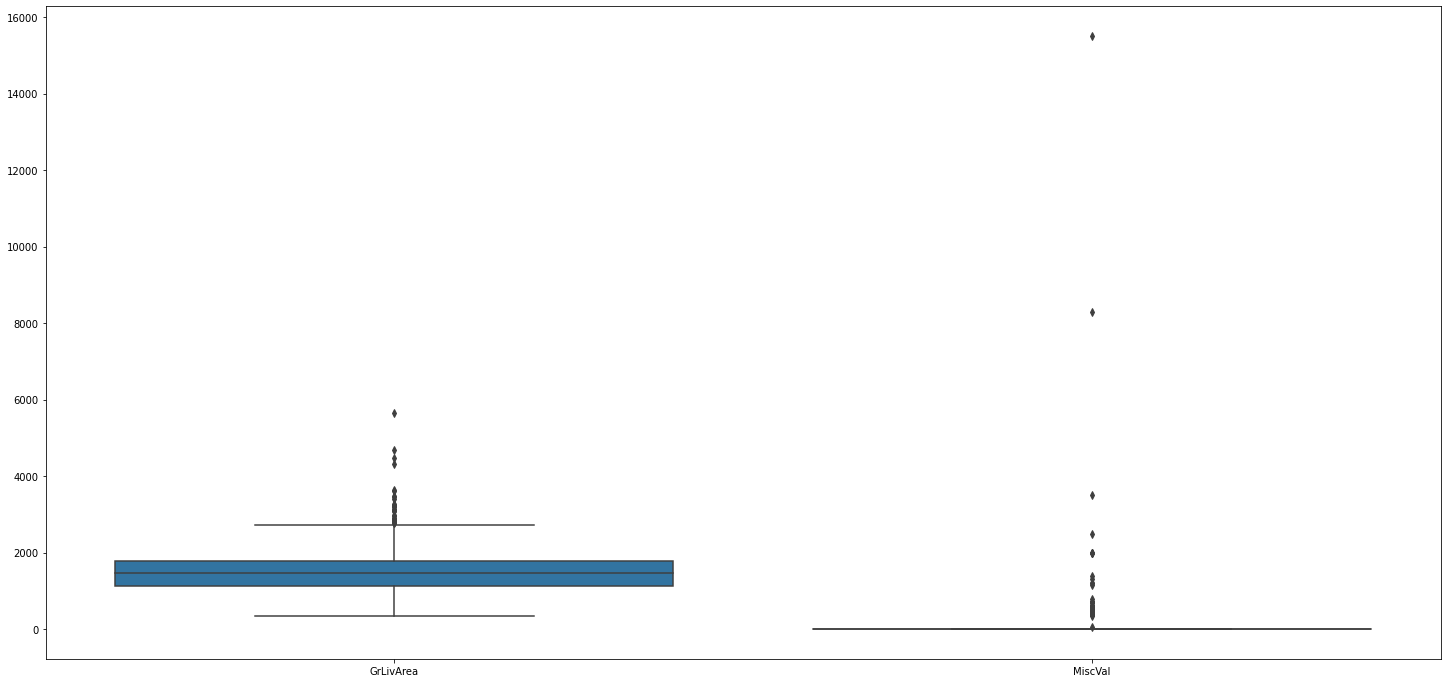

In [419]:
# Visualize numerical features
plt.figure(figsize=(25,12))
sns.boxplot(data=X_num.iloc[:, [18, 30]])
plt.show();

    Most features contain outliers. Robust Scaler will be used to minimize the effects of outliers.

######**Some Feature Engineering**

    Since Real-Estate appreciate with age and inflation, also, because inflation makes things more expensive, extension of a house structure 
    and remodelling of a house will cause an appreciation of its value.
    The time till renovation helps tell the quality of materials used to build house.
    The year till the garage was built might also indicate the resources put into building the house and how expensive it will be.
    Therefore, the year features will best be beneficially represented by the length of the time.

In [420]:
# engineer the year features
X_num['Age_Sold'] = X_num.apply(lambda row: row['YrSold'] - row['YearBuilt'], axis=1)
X_num['Renovation'] = X_num.apply(lambda row: row['YearRemodAdd'] - row['YearBuilt'], axis=1)
X_num['Garage_Age'] = X_num.apply(lambda row: row['GarageYrBlt'] - row['YearBuilt'], axis=1)

X_num.drop(['YearBuilt', 'YrSold', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [421]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   MasVnrArea     1452 non-null   float64
 10  BsmtFinSF1     1460 non-null   int64  
 11  BsmtFinSF2     1460 non-null   int64  
 12  BsmtUnfSF      1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

#### **Feature Selection**

#####**Numerical Features**

###### **Based on Variance**

In [422]:
# variance selector function
def variance_selector(A, m):

  if type(A) == pd.core.frame.DataFrame:
    X_num_scaled = pd.DataFrame(RobustScaler().fit_transform(A))
    X_num_scaled.columns = A.columns
    X_num_scaled
    B = A.copy()

  if type(A) == np.ndarray:
    X_num_scaled = pd.DataFrame(RobustScaler().fit_transform(A))
    X_num_scaled.columns = X_num.columns
    X_num_scaled
    B = pd.DataFrame(A, columns=X_num.columns)

  var_selector = VarianceThreshold(threshold=m)
  var_selector.fit_transform(X_num_scaled)
  chosen_cols = X_num_scaled.columns[var_selector.get_support(indices=True)]
  chosen_cols
    
  return B[chosen_cols]

In [423]:
# the columns to drop
drop_col = list(set(X_num.columns) - set(variance_selector(X_num, 0.3).columns))
drop_col

['BsmtHalfBath', 'HalfBath', 'BsmtFullBath', 'KitchenAbvGr']

In [424]:
X_num[drop_col].head()

,BsmtHalfBath,HalfBath,BsmtFullBath,KitchenAbvGr
Id,,,,
1,0,1,1,1
2,1,0,0,1
3,0,1,1,1
4,0,0,1,1
5,0,1,1,1


In [425]:
X_test[drop_col].head()

,BsmtHalfBath,HalfBath,BsmtFullBath,KitchenAbvGr
Id,,,,
1461,0.0,0,0.0,1
1462,0.0,1,0.0,1
1463,0.0,1,0.0,1
1464,0.0,1,0.0,1
1465,0.0,0,0.0,1


In [426]:
# drop columns based on the selection of the variance selector.
X_num.drop(drop_col, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [427]:
# apply same to test set.
X_test.drop(drop_col, axis=1, inplace=True)

######**Based on Inspection**

In [428]:
# drop PoolArea, ScreenPorch, LowQualFinSF, EnclosedPorch, 3SsnPorch; they have no substantial variability.
X_num.drop(['PoolArea', 'ScreenPorch', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch'], axis=1, inplace=True)

In [429]:
# apply same to the test set.
X_test.drop(['PoolArea', 'ScreenPorch', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch'], axis=1, inplace=True)

#####**Categorical Features**

######**Ordinal Features**

In [430]:
# inspect ordinal features
X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1379 non-null   object
 1   GarageFinish  1379 non-null   object
 2   GarageQual    1379 non-null   object
 3   Electrical    1459 non-null   object
 4   HeatingQC     1460 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinType1  1423 non-null   object
 7   BsmtExposure  1422 non-null   object
 8   KitchenQual   1460 non-null   object
 9   BsmtQual      1423 non-null   object
 10  BsmtCond      1423 non-null   object
 11  ExterCond     1460 non-null   object
 12  ExterQual     1460 non-null   object
 13  Functional    1460 non-null   object
 14  OverallQual   1460 non-null   object
 15  OverallCond   1460 non-null   object
 16  Street        1460 non-null   object
 17  LotShape      1460 non-null   object
 18  LandContour   1460 non-null   object
 19  Utilit

In [431]:
# use the variance selector developed by me for feature selection.
def cat_varselector(X, n):

  drop_col = list()

  for elem in X.columns.tolist():
    df = X[f'{elem}'].value_counts().reset_index()
    df = df.assign(percent = df[f'{elem}']/sum(df[f'{elem}']))
    df = df.assign(SQR = (df.percent)**2)
    
    if df.SQR.sum() > n:
      drop_col.append(elem)

  return drop_col

In [432]:
# ordinal drop columns.
drop_col = cat_varselector(X_cat_ord, 0.9)
drop_col

['GarageCond', 'GarageQual', 'Street', 'Utilities']

In [433]:
X_cat_ord[['GarageQual']].value_counts()

GarageQual
TA            1311
Fa              48
Gd              14
Ex               3
Po               3
dtype: int64

In [434]:
# apply the variance selector to ordinal features.
X_cat_ord.drop(drop_col, axis=1, inplace=True)

# apply to test set.
X_test.drop(drop_col, axis=1, inplace=True)

In [435]:
X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageFinish  1379 non-null   object
 1   Electrical    1459 non-null   object
 2   HeatingQC     1460 non-null   object
 3   BsmtFinType2  1422 non-null   object
 4   BsmtFinType1  1423 non-null   object
 5   BsmtExposure  1422 non-null   object
 6   KitchenQual   1460 non-null   object
 7   BsmtQual      1423 non-null   object
 8   BsmtCond      1423 non-null   object
 9   ExterCond     1460 non-null   object
 10  ExterQual     1460 non-null   object
 11  Functional    1460 non-null   object
 12  OverallQual   1460 non-null   object
 13  OverallCond   1460 non-null   object
 14  LotShape      1460 non-null   object
 15  LandContour   1460 non-null   object
 16  LotConfig     1460 non-null   object
 17  LandSlope     1460 non-null   object
 18  PavedDrive    1460 non-null   object
dtypes: obj

In [436]:
X_test[X_cat_ord.columns.tolist()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageFinish  1381 non-null   object
 1   Electrical    1459 non-null   object
 2   HeatingQC     1459 non-null   object
 3   BsmtFinType2  1417 non-null   object
 4   BsmtFinType1  1417 non-null   object
 5   BsmtExposure  1415 non-null   object
 6   KitchenQual   1458 non-null   object
 7   BsmtQual      1415 non-null   object
 8   BsmtCond      1414 non-null   object
 9   ExterCond     1459 non-null   object
 10  ExterQual     1459 non-null   object
 11  Functional    1457 non-null   object
 12  OverallQual   1459 non-null   int64 
 13  OverallCond   1459 non-null   int64 
 14  LotShape      1459 non-null   object
 15  LandContour   1459 non-null   object
 16  LotConfig     1459 non-null   object
 17  LandSlope     1459 non-null   object
 18  PavedDrive    1459 non-null   object
dtypes: 

In [437]:
# adjust the test set columns to reflect sameness as the train
X_test.loc[:, 'OverallQual'] = X_test.loc[:, 'OverallQual'].astype(str)
X_test.loc[:, 'OverallCond'] = X_test.loc[:, 'OverallCond'].astype(str)

In [438]:
X_cat_ord.columns

Index(['GarageFinish', 'Electrical', 'HeatingQC', 'BsmtFinType2',
       'BsmtFinType1', 'BsmtExposure', 'KitchenQual', 'BsmtQual', 'BsmtCond',
       'ExterCond', 'ExterQual', 'Functional', 'OverallQual', 'OverallCond',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'PavedDrive'],
      dtype='object')

In [439]:
# build pipeline to check ordinal features.
categ_a = ['N_A', 'NA', 'Unf', 'RFn', 'Fin']
categ_b = ['N_A', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
categ_c = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_d = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_e = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_f = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
categ_g = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_h = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_i = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_j = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_k = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_l = ['N_A', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
categ_m = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categ_n = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categ_o = ['IR3', 'IR2', 'IR1', 'Reg']
categ_p = ['Low', 'HLS', 'Bnk', 'Lvl']
categ_q = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']
categ_r = ['Sev', 'Mod', 'Gtl']
categ_s = ['N', 'P', 'Y']


cat_ord_categ = [categ_a, categ_b, categ_c, categ_d, categ_e, categ_f, categ_g, categ_h, categ_i,\
                 categ_j, categ_k, categ_l, categ_m, categ_n, categ_o, categ_p, categ_q, categ_r, categ_s]

cat_ordinal_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"), \
                                     OrdinalEncoder(categories=cat_ord_categ))
     

preprocessor = ColumnTransformer(transformers=[('cat_ord', cat_ordinal_pipeline, X_cat_ord.columns)])


model = DecisionTreeClassifier()

fullpipeline = make_pipeline(preprocessor, model)
fullpipeline.fit(X_cat_ord, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat_ord',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['N_A',
                                                                                               'NA',
                                                                                               'Unf',
                                                                                               'RFn',
                                                                                               'Fin'],
                                                                                              ['N_A',
                                                                                               'Mix',
                                                                                               'FuseP',
                                                                                               'FuseF',
                                                                                               'FuseA',
                                                                                               'SBrkr'],
                                                                                              ['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['N_A',
                                                                                               'NA',
                                                                                               'Unf',
                                                                                               'LwQ',
                                                                                               'Rec',
                                                                                               'BLQ'...
                                                                                               'Gtl'],
                                                                                              ['N',
                                                                                               'P',
                                                                                               'Y']]))]),
                                                  Index(['GarageFinish', 'Electrical', 'HeatingQC', 'BsmtFinType2',
       'BsmtFinType1', 'BsmtExposure', 'KitchenQual', 'BsmtQual', 'BsmtCond',
       'ExterCond', 'ExterQual', 'Functional', 'OverallQual', 'OverallCond',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'PavedDrive'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [440]:
fullpipeline.predict(X_cat_ord)

array([0, 0, 0, ..., 1, 0, 0])

In [441]:
fullpipeline.predict(X_test[X_cat_ord.columns.tolist()])

array([0, 0, 0, ..., 0, 0, 0])

    This shows that everything is okay with the ordinal categorical data, next I turn to the nominal categorical data

######**Nominal Features**

In [442]:
# inspect nominal features.
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   Heating        1460 non-null   object
 3   CentralAir     1460 non-null   object
 4   Foundation     1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   Condition2     1460 non-null   object
 7   BldgType       1460 non-null   object
 8   HouseStyle     1460 non-null   object
 9   RoofStyle      1460 non-null   object
 10  RoofMatl       1460 non-null   object
 11  Exterior1st    1460 non-null   object
 12  Exterior2nd    1460 non-null   object
 13  MasVnrType     1452 non-null   object
 14  GarageType     1379 non-null   object
 15  SaleType       1460 non-null   object
 16  SaleCondition  1460 non-null   object
 17  MSSubClass     1460 non-null   object
 18  MoSold         1460 non-null

In [443]:
X_test[X_cat_onehot.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   Condition1     1459 non-null   object
 2   Heating        1459 non-null   object
 3   CentralAir     1459 non-null   object
 4   Foundation     1459 non-null   object
 5   Neighborhood   1459 non-null   object
 6   Condition2     1459 non-null   object
 7   BldgType       1459 non-null   object
 8   HouseStyle     1459 non-null   object
 9   RoofStyle      1459 non-null   object
 10  RoofMatl       1459 non-null   object
 11  Exterior1st    1458 non-null   object
 12  Exterior2nd    1458 non-null   object
 13  MasVnrType     1443 non-null   object
 14  GarageType     1383 non-null   object
 15  SaleType       1458 non-null   object
 16  SaleCondition  1459 non-null   object
 17  MSSubClass     1459 non-null   int64 
 18  MoSold         1459 non-n

In [444]:
# adjust the columns in the test set to same type
X_test.loc[:, 'MSSubClass'] = X_test.loc[:, 'MSSubClass'].astype(str)
X_test.loc[:, 'MoSold'] = X_test.loc[:, 'MoSold'].astype(str)

In [445]:
# use the variance selector developed by me for feature selection.
def cat_varselector(X, n):

  drop_col = list()

  for elem in X.columns.tolist():
    df = X[f'{elem}'].value_counts().reset_index()
    df = df.assign(percent = df[f'{elem}']/sum(df[f'{elem}']))
    df = df.assign(SQR = (df.percent)**2)
    
    if df.SQR.sum() > n:
      drop_col.append(elem)

  return drop_col

In [446]:
# ordinal drop columns.
drop_col = cat_varselector(X_cat_onehot, 0.9)
drop_col

['Heating', 'Condition2', 'RoofMatl']

In [447]:
X_cat_onehot[drop_col]

,Heating,Condition2,RoofMatl
Id,,,
1,GasA,Norm,CompShg
2,GasA,Norm,CompShg
3,GasA,Norm,CompShg
4,GasA,Norm,CompShg
5,GasA,Norm,CompShg
...,...,...,...
1456,GasA,Norm,CompShg
1457,GasA,Norm,CompShg
1458,GasA,Norm,CompShg


In [448]:
for elem in X_cat_onehot[drop_col].columns.tolist():
  print(X_cat_onehot[drop_col][f'{elem}'].value_counts())
  print('\n')

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64




In [449]:
# apply the variance selector to ordinal features.
X_cat_onehot.drop(drop_col, axis=1, inplace=True)

# apply to test set.
X_test.drop(drop_col, axis=1, inplace=True)

In [450]:
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   CentralAir     1460 non-null   object
 3   Foundation     1460 non-null   object
 4   Neighborhood   1460 non-null   object
 5   BldgType       1460 non-null   object
 6   HouseStyle     1460 non-null   object
 7   RoofStyle      1460 non-null   object
 8   Exterior1st    1460 non-null   object
 9   Exterior2nd    1460 non-null   object
 10  MasVnrType     1452 non-null   object
 11  GarageType     1379 non-null   object
 12  SaleType       1460 non-null   object
 13  SaleCondition  1460 non-null   object
 14  MSSubClass     1460 non-null   object
 15  MoSold         1460 non-null   object
dtypes: object(16)
memory usage: 193.9+ KB


In [451]:
# build pipeline to check the goodness of the prepared data set.
cat_onehot_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                    OneHotEncoder(drop='first', handle_unknown="ignore")
                                   )
        

preprocessor = ColumnTransformer(transformers=[('cat_onehot', cat_onehot_pipeline, X_cat_onehot.columns)])


param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(2, 4),
              'decisiontreeclassifier__min_samples_leaf': range(2, 3),
              'decisiontreeclassifier__min_samples_split': range(2, 3)
             }


model = DecisionTreeClassifier()

fullpipeline = make_pipeline(preprocessor, model)

search = GridSearchCV(fullpipeline, param_grid=param_grid, cv=5, verbose=1)
search.fit(X_cat_onehot, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories i

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat_onehot',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='N_A',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         Index(['MSZoning', 'Condition1', 'CentralAir', 'Foundation', 'Neighborhood',
       'BldgType...
       'MasVnrType', 'GarageType', 'SaleType', 'SaleCondition', 'MSSubClass',
       'MoSold'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 4),
                         'decisiontreeclassifier__min_samples_leaf': range(2, 3),
                         'decisiontreeclassifier__min_samples_split': range(2, 3)},
             verbose=1)

    Unknown categories found in the columns 7, 8, & 9 train set.

---



In [452]:
search.predict(X_cat_onehot)

array([0, 0, 0, ..., 0, 0, 0])

In [453]:
# check the prediction for unknown categories.
search.predict(X_test[X_cat_onehot.columns.tolist()])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0, 8, 9, 12, 14] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


array([0, 0, 0, ..., 0, 0, 0])

    Unknown category found in columns 0, 8, 9, 12 & 14. We must adjust the test set slightly to eliminate this.

In [454]:
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   CentralAir     1460 non-null   object
 3   Foundation     1460 non-null   object
 4   Neighborhood   1460 non-null   object
 5   BldgType       1460 non-null   object
 6   HouseStyle     1460 non-null   object
 7   RoofStyle      1460 non-null   object
 8   Exterior1st    1460 non-null   object
 9   Exterior2nd    1460 non-null   object
 10  MasVnrType     1452 non-null   object
 11  GarageType     1379 non-null   object
 12  SaleType       1460 non-null   object
 13  SaleCondition  1460 non-null   object
 14  MSSubClass     1460 non-null   object
 15  MoSold         1460 non-null   object
dtypes: object(16)
memory usage: 193.9+ KB


In [455]:
X_test[X_cat_onehot.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   Condition1     1459 non-null   object
 2   CentralAir     1459 non-null   object
 3   Foundation     1459 non-null   object
 4   Neighborhood   1459 non-null   object
 5   BldgType       1459 non-null   object
 6   HouseStyle     1459 non-null   object
 7   RoofStyle      1459 non-null   object
 8   Exterior1st    1458 non-null   object
 9   Exterior2nd    1458 non-null   object
 10  MasVnrType     1443 non-null   object
 11  GarageType     1383 non-null   object
 12  SaleType       1458 non-null   object
 13  SaleCondition  1459 non-null   object
 14  MSSubClass     1459 non-null   object
 15  MoSold         1459 non-null   object
dtypes: object(16)
memory usage: 193.8+ KB


In [470]:
X_cat_onehot.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
AsphShn      3
BrkComm      2
Stone        2
Name: Exterior1st, dtype: int64

In [469]:
# check and eliminate unknown categories in test set
X_test.Exterior1st.value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      3
Name: Exterior1st, dtype: int64

In [458]:
X_cat_onehot[X_cat_onehot.Exterior1st == 'Stone' ]

,MSZoning,Condition1,CentralAir,Foundation,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,GarageType,SaleType,SaleCondition,MSSubClass,MoSold
Id,,,,,,,,,,,,,,,,
1025,RL,Norm,Y,CBlock,Timber,1Fam,1Story,Hip,Stone,HdBoard,None,Attchd,COD,Abnorml,20,5
1153,RL,Norm,Y,PConc,Crawfor,1Fam,1Story,Gable,Stone,Stone,None,Attchd,WD,Abnorml,20,7


In [459]:
# check and eliminate unknown categories in test set
X_test[X_test.Exterior2nd.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Age_Sold,Renovation,Garage_Age
Id,,,,,,,,,,,,,,,,,,,,,
2152,30,RL,85.0,19550,NaN,Reg,Lvl,Inside,Gtl,Edwards,...,NaN,NaN,NaN,0,1,WD,Normal,68,67,NaN


In [460]:
# # check and eliminate unknown categories in the train and test set
X_cat_onehot.loc[1438, 'RoofStyle'] = 'Shed'      # Hip
X_cat_onehot.loc[20, 'RoofStyle'] = 'Shed'        # Hip
X_cat_onehot.loc[1438, 'RoofStyle'] = 'Shed'      # Hip
X_cat_onehot.loc[1188, 'Exterior1st'] = 'AsphShn'
X_cat_onehot.loc[1371, 'Exterior1st'] = 'AsphShn'
X_cat_onehot.loc[596, 'Exterior2nd'] = 'CBlock'

X_test.loc[2819, 'MSSubClass'] = '40'

X_test.loc[2490, 'SaleType'] = 'ConLw'

X_test.loc[2905, 'Exterior1st'] = 'AsphShn'
X_test.loc[2152, 'Exterior1st'] = 'AsphShn'
X_test.loc[2152, 'Exterior2nd'] = 'AsphShn'

X_test.loc[1916, 'MSZoning'] = 'RH'
X_test.loc[2217, 'MSZoning'] = 'RH'
X_test.loc[2251, 'MSZoning'] = 'RH'
X_test.loc[2905, 'MSZoning'] = 'RH'

In [461]:
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   CentralAir     1460 non-null   object
 3   Foundation     1460 non-null   object
 4   Neighborhood   1460 non-null   object
 5   BldgType       1460 non-null   object
 6   HouseStyle     1460 non-null   object
 7   RoofStyle      1460 non-null   object
 8   Exterior1st    1460 non-null   object
 9   Exterior2nd    1460 non-null   object
 10  MasVnrType     1452 non-null   object
 11  GarageType     1379 non-null   object
 12  SaleType       1460 non-null   object
 13  SaleCondition  1460 non-null   object
 14  MSSubClass     1460 non-null   object
 15  MoSold         1460 non-null   object
dtypes: object(16)
memory usage: 226.2+ KB


In [462]:
# build pipeline to recheck the goodness of the prepared data set.
cat_onehot_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                    OneHotEncoder(drop='first', handle_unknown="ignore")
                                   )
        

preprocessor = ColumnTransformer(transformers=[('cat_onehot', cat_onehot_pipeline, X_cat_onehot.columns)])

param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(2, 4),
              'decisiontreeclassifier__min_samples_leaf': range(2, 3),
              'decisiontreeclassifier__min_samples_split': range(2, 3)
             }


model = DecisionTreeClassifier()

fullpipeline = make_pipeline(preprocessor, model)

search = GridSearchCV(fullpipeline, param_grid=param_grid, cv=5, verbose=1)
search.fit(X_cat_onehot, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat_onehot',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='N_A',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         Index(['MSZoning', 'Condition1', 'CentralAir', 'Foundation', 'Neighborhood',
       'BldgType...
       'MasVnrType', 'GarageType', 'SaleType', 'SaleCondition', 'MSSubClass',
       'MoSold'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 4),
                         'decisiontreeclassifier__min_samples_leaf': range(2, 3),
                         'decisiontreeclassifier__min_samples_split': range(2, 3)},
             verbose=1)

In [463]:
search.predict(X_cat_onehot)

array([0, 0, 0, ..., 0, 0, 0])

In [464]:
# check the prediction for unknown categories.
search.predict(X_test[X_cat_onehot.columns.tolist()])

array([0, 0, 0, ..., 0, 0, 0])

    Now everything is fine with the nominal features since no more unknown categories. Now to develop the full pipeline and model without scaling.

In [473]:
# Join all the train set parts.
X_train = pd.concat([X_num, X_cat_ord, X_cat_onehot], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   GarageCars     1460 non-null   int64  
 6   WoodDeckSF     1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  TotRmsAbvGrd   1460 non-null   int64  
 16  GarageArea     1460 non-null   int64  
 17  OpenPorchSF    1460 non-null   int64  
 18  MiscVal 

#### **Build Pipeline and Model**

######**Preprocessing Compiler**

In [477]:
# define a function to transform a column based on observation.
def col_trans(X_col):

  # create copy of input series
  X_col_copy = X_col.copy().squeeze()
  
  # missing value filler.
  filler = int(np.round(np.median([x for x in X_col_copy if (x != 0) & (x == x)])))

  # fill in the missing values
  for idx in list(X_col_copy[X_col_copy.isna()].index):
      X_col_copy.loc[idx] = filler

  return X_col_copy.to_frame(name='MasVnrArea')

In [489]:
# make numerical features pipeline.
col1 = X_num.columns.tolist()
col1.remove('MasVnrArea')

col2 = ['MasVnrArea']


numeric_pipeline1 = make_pipeline(SimpleImputer())
numeric_pipeline2 = make_pipeline(FunctionTransformer(func=col_trans, validate=False))

preprocessor1 = ColumnTransformer(transformers=[('num_pipe1', numeric_pipeline1, col1),
                                                ('num_pipe2', numeric_pipeline2, col2)
                                               ]
                                 )

full_numeric_pipeline = make_pipeline(preprocessor1,
                                      RobustScaler()
                                     )


# make ordinal features pipeline.
categ_a = ['N_A', 'NA', 'Unf', 'RFn', 'Fin']
categ_b = ['N_A', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
categ_c = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_d = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_e = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_f = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
categ_g = ['N_A', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_h = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_i = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_j = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_k = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_l = ['N_A', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
categ_m = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categ_n = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categ_o = ['IR3', 'IR2', 'IR1', 'Reg']
categ_p = ['Low', 'HLS', 'Bnk', 'Lvl']
categ_q = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']
categ_r = ['Sev', 'Mod', 'Gtl']
categ_s = ['N', 'P', 'Y']


cat_ord_categ = [categ_a, categ_b, categ_c, categ_d, categ_e, categ_f, categ_g, categ_h, categ_i,\
                 categ_j, categ_k, categ_l, categ_m, categ_n, categ_o, categ_p, categ_q, categ_r, categ_s]

cat_ordinal_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"), \
                                     OrdinalEncoder(categories=cat_ord_categ))
     

cat_onehot_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                    OneHotEncoder(drop='first', handle_unknown="ignore")
                                    )
         
        

preprocessor = ColumnTransformer(transformers=[('num_pipe', full_numeric_pipeline, X_num.columns),
                                               ('cat_onehot', cat_onehot_pipeline, X_cat_onehot.columns),
                                               ('cat_ord', cat_ordinal_pipeline, X_cat_ord.columns)
                                              ]
                                )

columntransformer_param = ['mean', 'median']

pd.DataFrame(preprocessor.fit_transform(X_train, y_train))

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
0,-0.254076,-0.265787,-0.269652,0.0,-1.0,0.0,0.000000,0.452790,0.0,-0.559829,...,2.0,3.0,8.0,6.0,4.0,3.0,3.0,0.0,2.0,2.0
1,0.030015,0.523686,0.538308,0.0,0.0,0.0,1.773810,0.834679,0.0,-0.330769,...,2.0,2.0,8.0,5.0,7.0,3.0,3.0,3.0,2.0,2.0
2,0.437624,-0.107893,-0.142289,0.0,0.0,0.0,0.000000,0.143910,0.0,-0.074359,...,2.0,3.0,8.0,6.0,4.0,2.0,3.0,0.0,2.0,2.0
3,0.017663,-0.528945,-0.468657,0.0,0.0,1.0,0.000000,-0.235170,0.0,0.106838,...,2.0,2.0,8.0,6.0,4.0,2.0,3.0,1.0,2.0,2.0
4,1.181201,0.734213,0.305473,1.0,0.0,1.0,1.142857,0.381186,0.0,0.021368,...,2.0,3.0,8.0,7.0,4.0,2.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.385746,-0.423682,-0.076617,0.0,0.0,0.0,0.000000,-0.538435,0.0,0.812821,...,2.0,2.0,8.0,5.0,4.0,3.0,3.0,0.0,2.0,2.0
1456,0.913167,0.786844,1.095522,0.0,1.0,0.0,2.077381,0.570727,163.0,0.190598,...,2.0,2.0,7.0,5.0,5.0,3.0,3.0,0.0,2.0,2.0
1457,-0.107831,-0.213156,0.319403,1.0,1.0,-1.0,0.000000,-0.152334,0.0,0.682906,...,3.0,4.0,8.0,6.0,8.0,3.0,3.0,0.0,2.0,2.0
1458,0.058918,-0.107893,0.172139,-1.0,-1.0,-1.0,2.178571,-0.469638,1029.0,-0.816239,...,2.0,2.0,8.0,4.0,5.0,3.0,3.0,0.0,2.0,2.0


######**Model Pipeline**

    Hyperparameters to train
    
    - Epoch
    - Batch size.
    - Optimizer.
    - Network weight initialization.
    - Neuron activation function.
    - Number of layers.
    - Number of neuron in layers.
    - Dropout_rate & weight_constraint.

    These different hyperparameters shall be tried with only little span.

In [516]:
# define the base neural network as a function.
def neunet_model(init_mode, optimizer):
  # create model
  model = keras.Sequential()

  # define first layer
  model.add(keras.layers.Dense(173, activation='leaky_relu', input_shape=(173,)))

  # add dropout layer
  model.add(keras.layers.Dropout(0.15))

  # define a second layer
  model.add(keras.layers.Dense(80, activation='leaky_relu'))

  # add dropout layer
  model.add(keras.layers.Dropout(0.2))

  ## define a third layer
  model.add(keras.layers.Dense(35, activation='leaky_relu'))

  # define output layer
  model.add(keras.layers.Dense(1, kernel_initializer=init_mode, activation='sigmoid'))

  # compile model
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

  return model

In [ ]:
# create the estimator
keras_estimator = KerasClassifier(model=neunet_model, verbose=1)

# make pipeline for data and estimator.
pipe_estimator = make_pipeline(preprocessor, keras_estimator)

# define the grid search parameters
batch_size = [10, 15]
epochs = [10, 15]

param_grid = dict(columntransformer__num_pipe__columntransformer__num_pipe1__simpleimputer__strategy=columntransformer_param, 
                  kerasclassifier__batch_size=batch_size, 
                  kerasclassifier__epochs=epochs,
                  kerasclassifier__model__init_mode= ['glorot_uniform'],
                  kerasclassifier__model__optimizer=['Adam', 'SGD',]
                  )

# define the gridsearch and fit.
grid = GridSearchCV(estimator=pipe_estimator, param_grid=param_grid, cv=7)
grid_results = grid.fit(X_train, y_train)

In [518]:
grid_results

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('columntransformer',
                                                                                          ColumnTransformer(transformers=[('num_pipe1',
                                                                                                                           Pipeline(steps=[('simpleimputer',
                                                                                                                                            SimpleImputer())]),
                                                                                                                           ['LotArea',
                                                                                                                            'LotFrontage',
                                                                                                                            'TotalBsmtSF',
                                                                                                                            'BedroomAbvGr',
                                                                                                                            'Fireplaces',
                                                                                                                            'GarageCars',
                                                                                                                            'WoodDeckSF',
                                                                                                                            'BsmtFinSF1',
                                                                                                                            '...
                                        KerasClassifier(model=<function neunet_model at 0x7f5fc76efb00>))]),
             param_grid={'columntransformer__num_pipe__columntransformer__num_pipe1__simpleimputer__strategy': ['mean',
                                                                                                                'median'],
                         'kerasclassifier__batch_size': [10, 15],
                         'kerasclassifier__epochs': [10, 15],
                         'kerasclassifier__model__init_mode': ['glorot_uniform'],
                         'kerasclassifier__model__optimizer': ['Adam', 'SGD']})

In [522]:
grid.best_params_

{'columntransformer__num_pipe__columntransformer__num_pipe1__simpleimputer__strategy': 'mean',
 'kerasclassifier__batch_size': 10,
 'kerasclassifier__epochs': 10,
 'kerasclassifier__model__init_mode': 'glorot_uniform',
 'kerasclassifier__model__optimizer': 'Adam'}

In [523]:
accuracy_score(y_test_true, grid.predict(X_test))

146/146 [==============================] - 0s 1ms/step


0.9705277587388622

In [524]:
est_result = pd.concat([pd.DataFrame({'pred':grid.predict(X_test)}).reset_index(drop=True), y_test_true.reset_index(drop=True)], axis=1)
est_result

146/146 [==============================] - 0s 1ms/step


,pred,Expensive
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1454,0,0
1455,0,0
1456,0,0
1457,0,0


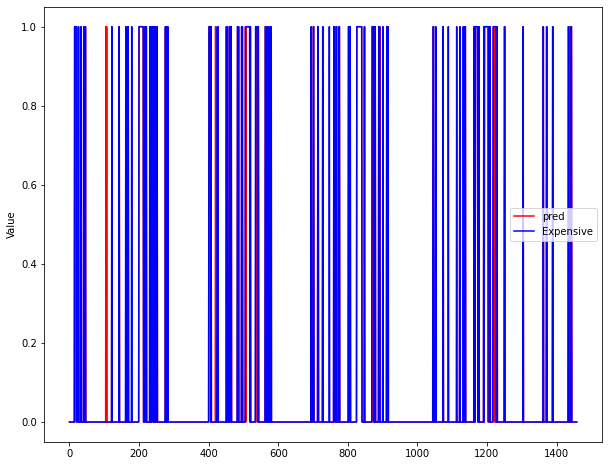

In [525]:
plt.figure(figsize=(10,8))
sns.lineplot(color='red', data=est_result['pred'])
sns.lineplot(color='blue', data=est_result['Expensive'])
plt.legend(est_result)
plt.ylabel('Value')
plt.show();